In [1]:
import re
import string
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_excel('tweets_live.xlsx')

In [3]:
df

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen
0,@soyoy,2024-01-11T16:02:32.000Z,oh alan walker dont cry,1.0,2.0,28.0,988,0.0
1,@YourNayaab1,2024-01-12T18:55:50.000Z,"Darling!\nWhen you're not by my side, my heart...",NaN,55.0,53.0,766,1.0
2,@x2_xstart,2024-01-12T18:17:36.000Z,BEST Shuffle Dance Compilation Alan Walker S...,9.0,7.0,9.0,55,1.0
3,@mcravercore,2024-01-07T19:27:52.000Z,lovin walker world so much dj alan walker,1.0,1.0,1.0,84,1.0
4,@ardellaadel,2024-01-09T02:59:56.000Z,Alan Walker - Not You \n\nPetronas Malaysia Op...,NaN,NaN,NaN,80,1.0
5,@IAmAlanWalker,2024-01-10T11:38:47.000Z,Which song have you listened to the most?,85.0,77.0,511.0,32K,1.0
6,@IAmAlanWalker,2024-01-07T16:05:16.000Z,What do you think of #WhoIam so far?,68.0,37.0,486.0,29K,1.0
7,@AnyGman,2024-01-12T15:29:22.000Z,Hello TwitterX\n\nAlan Walker ~ Unity,1.0,1.0,5.0,81,0.0
8,@CupidMissy,2024-01-11T04:32:56.000Z,Alan Walker,4.0,NaN,9.0,439,0.0
9,@_JEON__97_JK,2024-01-06T13:15:47.000Z,~We're not in love\nWe share no stories\nJust ...,4.0,6.0,36.0,1.2K,-1.0


In [ ]:
df = df.drop(['Sentimen'], axis=1)

In [4]:
df.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen
0,@soyoy,2024-01-11T16:02:32.000Z,oh alan walker dont cry,1.0,2.0,28.0,988,0.0
1,@YourNayaab1,2024-01-12T18:55:50.000Z,"Darling!\nWhen you're not by my side, my heart...",NaN,55.0,53.0,766,1.0
2,@x2_xstart,2024-01-12T18:17:36.000Z,BEST Shuffle Dance Compilation Alan Walker S...,9.0,7.0,9.0,55,1.0
3,@mcravercore,2024-01-07T19:27:52.000Z,lovin walker world so much dj alan walker,1.0,1.0,1.0,84,1.0
4,@ardellaadel,2024-01-09T02:59:56.000Z,Alan Walker - Not You \n\nPetronas Malaysia Op...,NaN,NaN,NaN,80,1.0


In [5]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
    'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True, # fix HTML tokens
    
    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",
    
    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",
    
    unpack_hashtags=True, # perform word segmentation on hashtags
    unpack_contractions=True, # Unpack contractions (can't -> can not)
    spell_correct_elong=False, # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


In [6]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
    
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')
    
def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub(r'\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()
    
def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [7]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text)

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [8]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc)
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [9]:
df["step01"] = final_string

In [10]:
df.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01
0,@soyoy,2024-01-11T16:02:32.000Z,oh alan walker dont cry,1.0,2.0,28.0,988,0.0,oh alan walker dont cry
1,@YourNayaab1,2024-01-12T18:55:50.000Z,"Darling!\nWhen you're not by my side, my heart...",NaN,55.0,53.0,766,1.0,darling when youre not by my side my heart sti...
2,@x2_xstart,2024-01-12T18:17:36.000Z,BEST Shuffle Dance Compilation Alan Walker S...,9.0,7.0,9.0,55,1.0,best shuffle dance compilation alan walker spe...
3,@mcravercore,2024-01-07T19:27:52.000Z,lovin walker world so much dj alan walker,1.0,1.0,1.0,84,1.0,lovin walker world so much dj alan walker
4,@ardellaadel,2024-01-09T02:59:56.000Z,Alan Walker - Not You \n\nPetronas Malaysia Op...,NaN,NaN,NaN,80,1.0,alan walker not you petronas malaysia open p...
5,@IAmAlanWalker,2024-01-10T11:38:47.000Z,Which song have you listened to the most?,85.0,77.0,511.0,32K,1.0,which song have you listened to the most
6,@IAmAlanWalker,2024-01-07T16:05:16.000Z,What do you think of #WhoIam so far?,68.0,37.0,486.0,29K,1.0,what do you think of so far
7,@AnyGman,2024-01-12T15:29:22.000Z,Hello TwitterX\n\nAlan Walker ~ Unity,1.0,1.0,5.0,81,0.0,hello twitterx alan walker unity
8,@CupidMissy,2024-01-11T04:32:56.000Z,Alan Walker,4.0,NaN,9.0,439,0.0,alan walker
9,@_JEON__97_JK,2024-01-06T13:15:47.000Z,~We're not in love\nWe share no stories\nJust ...,4.0,6.0,36.0,1.2K,-1.0,were not in love we share no stories just some...


In [11]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [12]:
df_new = df[~df.isin(df_hapus)].dropna()

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 37
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserTags    14 non-null     object 
 1   TimeStamps  14 non-null     object 
 2   Tweets      14 non-null     object 
 3   Replys      14 non-null     float64
 4   reTweets    14 non-null     float64
 5   Likes       14 non-null     float64
 6   Views       14 non-null     object 
 7   Sentimen    14 non-null     float64
 8   step01      14 non-null     object 
dtypes: float64(4), object(5)
memory usage: 1.1+ KB


In [ ]:
# nltk.download('punkt')

In [14]:
# token
import nltk
from nltk.tokenize import word_tokenize

In [15]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [16]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [17]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens
0,@soyoy,2024-01-11T16:02:32.000Z,oh alan walker dont cry,1.0,2.0,28.0,988,0.0,oh alan walker dont cry,"[oh, alan, walker, dont, cry]"
2,@x2_xstart,2024-01-12T18:17:36.000Z,BEST Shuffle Dance Compilation Alan Walker S...,9.0,7.0,9.0,55,1.0,best shuffle dance compilation alan walker spe...,"[best, shuffle, dance, compilation, alan, walk..."
3,@mcravercore,2024-01-07T19:27:52.000Z,lovin walker world so much dj alan walker,1.0,1.0,1.0,84,1.0,lovin walker world so much dj alan walker,"[lovin, walker, world, so, much, dj, alan, wal..."
5,@IAmAlanWalker,2024-01-10T11:38:47.000Z,Which song have you listened to the most?,85.0,77.0,511.0,32K,1.0,which song have you listened to the most,"[which, song, have, you, listened, to, the, most]"
6,@IAmAlanWalker,2024-01-07T16:05:16.000Z,What do you think of #WhoIam so far?,68.0,37.0,486.0,29K,1.0,what do you think of so far,"[what, do, you, think, of, so, far]"
7,@AnyGman,2024-01-12T15:29:22.000Z,Hello TwitterX\n\nAlan Walker ~ Unity,1.0,1.0,5.0,81,0.0,hello twitterx alan walker unity,"[hello, twitterx, alan, walker, unity]"
9,@_JEON__97_JK,2024-01-06T13:15:47.000Z,~We're not in love\nWe share no stories\nJust ...,4.0,6.0,36.0,1.2K,-1.0,were not in love we share no stories just some...,"[were, not, in, love, we, share, no, stories, ..."
10,@AnyGman,2024-01-05T22:53:30.000Z,GN TwitterX \n\nAlan Walker - On My Way,1.0,2.0,5.0,146,0.0,gn twitterx alan walker on my way,"[gn, twitterx, alan, walker, on, my, way]"
12,@Anishflips,2024-01-08T06:30:18.000Z,(Somewhat) daily update. The worst feeling is ...,1.0,1.0,8.0,612,-1.0,somewhat daily update the worst feeling is whe...,"[somewhat, daily, update, the, worst, feeling,..."
13,@AlanSources,2024-01-06T20:12:58.000Z,| \n@IAmAlanWalker\n in new photos.,3.0,8.0,76.0,1.7K,1.0,iamalanwalker in new photos,"[iamalanwalker, in, new, photos]"


In [ ]:
normalized_word = pd.read_csv('kamus_alzami_clean.csv', sep=",")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [ ]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [ ]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [18]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens
0,@soyoy,2024-01-11T16:02:32.000Z,oh alan walker dont cry,1.0,2.0,28.0,988,0.0,oh alan walker dont cry,"[oh, alan, walker, dont, cry]"
2,@x2_xstart,2024-01-12T18:17:36.000Z,BEST Shuffle Dance Compilation Alan Walker S...,9.0,7.0,9.0,55,1.0,best shuffle dance compilation alan walker spe...,"[best, shuffle, dance, compilation, alan, walk..."
3,@mcravercore,2024-01-07T19:27:52.000Z,lovin walker world so much dj alan walker,1.0,1.0,1.0,84,1.0,lovin walker world so much dj alan walker,"[lovin, walker, world, so, much, dj, alan, wal..."
5,@IAmAlanWalker,2024-01-10T11:38:47.000Z,Which song have you listened to the most?,85.0,77.0,511.0,32K,1.0,which song have you listened to the most,"[which, song, have, you, listened, to, the, most]"
6,@IAmAlanWalker,2024-01-07T16:05:16.000Z,What do you think of #WhoIam so far?,68.0,37.0,486.0,29K,1.0,what do you think of so far,"[what, do, you, think, of, so, far]"
7,@AnyGman,2024-01-12T15:29:22.000Z,Hello TwitterX\n\nAlan Walker ~ Unity,1.0,1.0,5.0,81,0.0,hello twitterx alan walker unity,"[hello, twitterx, alan, walker, unity]"
9,@_JEON__97_JK,2024-01-06T13:15:47.000Z,~We're not in love\nWe share no stories\nJust ...,4.0,6.0,36.0,1.2K,-1.0,were not in love we share no stories just some...,"[were, not, in, love, we, share, no, stories, ..."
10,@AnyGman,2024-01-05T22:53:30.000Z,GN TwitterX \n\nAlan Walker - On My Way,1.0,2.0,5.0,146,0.0,gn twitterx alan walker on my way,"[gn, twitterx, alan, walker, on, my, way]"
12,@Anishflips,2024-01-08T06:30:18.000Z,(Somewhat) daily update. The worst feeling is ...,1.0,1.0,8.0,612,-1.0,somewhat daily update the worst feeling is whe...,"[somewhat, daily, update, the, worst, feeling,..."
13,@AlanSources,2024-01-06T20:12:58.000Z,| \n@IAmAlanWalker\n in new photos.,3.0,8.0,76.0,1.7K,1.0,iamalanwalker in new photos,"[iamalanwalker, in, new, photos]"


In [19]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

In [21]:
# !pip install Sastrawi

     ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/209.7 kB ? eta -:--:--
     ----- ------------------------------- 30.7/209.7 kB 330.3 kB/s eta 0:00:01
     ----- ------------------------------- 30.7/209.7 kB 330.3 kB/s eta 0:00:01
     --------------------- -------------- 122.9/209.7 kB 804.6 kB/s eta 0:00:01
     --------------------- -------------- 122.9/209.7 kB 804.6 kB/s eta 0:00:01
     --------------------------------- -- 194.6/209.7 kB 845.5 kB/s eta 0:00:01
     ------------------------------------ 209.7/209.7 kB 709.7 kB/s eta 0:00:00


In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']

# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [22]:
df_new['step01'] = df_new['step01'].apply(str)

In [23]:
df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens
0,@soyoy,2024-01-11T16:02:32.000Z,oh alan walker dont cry,1.0,2.0,28.0,988,0.0,oh alan walker dont cry,"[oh, alan, walker, dont, cry]"
2,@x2_xstart,2024-01-12T18:17:36.000Z,BEST Shuffle Dance Compilation Alan Walker S...,9.0,7.0,9.0,55,1.0,best shuffle dance compilation alan walker spe...,"[best, shuffle, dance, compilation, alan, walk..."
3,@mcravercore,2024-01-07T19:27:52.000Z,lovin walker world so much dj alan walker,1.0,1.0,1.0,84,1.0,lovin walker world so much dj alan walker,"[lovin, walker, world, so, much, dj, alan, wal..."
5,@IAmAlanWalker,2024-01-10T11:38:47.000Z,Which song have you listened to the most?,85.0,77.0,511.0,32K,1.0,which song have you listened to the most,"[which, song, have, you, listened, to, the, most]"
6,@IAmAlanWalker,2024-01-07T16:05:16.000Z,What do you think of #WhoIam so far?,68.0,37.0,486.0,29K,1.0,what do you think of so far,"[what, do, you, think, of, so, far]"


In [24]:
i=0
final_string = []
s = ""
for sentence in df_new["step01"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [25]:
df_new.loc[:, ('ProcessedText')] = final_string

In [26]:
df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentimen,step01,tokens,ProcessedText
0,@soyoy,2024-01-11T16:02:32.000Z,oh alan walker dont cry,1.0,2.0,28.0,988,0.0,oh alan walker dont cry,"[oh, alan, walker, dont, cry]",alan walker dont cry
2,@x2_xstart,2024-01-12T18:17:36.000Z,BEST Shuffle Dance Compilation Alan Walker S...,9.0,7.0,9.0,55,1.0,best shuffle dance compilation alan walker spe...,"[best, shuffle, dance, compilation, alan, walk...",best shuffle dance compilation alan walker spe...
3,@mcravercore,2024-01-07T19:27:52.000Z,lovin walker world so much dj alan walker,1.0,1.0,1.0,84,1.0,lovin walker world so much dj alan walker,"[lovin, walker, world, so, much, dj, alan, wal...",lovin walker world so much dj alan walker
5,@IAmAlanWalker,2024-01-10T11:38:47.000Z,Which song have you listened to the most?,85.0,77.0,511.0,32K,1.0,which song have you listened to the most,"[which, song, have, you, listened, to, the, most]",which song have you listened to the most
6,@IAmAlanWalker,2024-01-07T16:05:16.000Z,What do you think of #WhoIam so far?,68.0,37.0,486.0,29K,1.0,what do you think of so far,"[what, do, you, think, of, so, far]",what do you think of so far


In [27]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

In [28]:
import pandas as pd
import numpy as np

In [29]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [30]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [31]:
dataset_feature.head()

0                                 alan walker dont cry
1    best shuffle dance compilation alan walker spe...
2            lovin walker world so much dj alan walker
3             which song have you listened to the most
4                          what do you think of so far
Name: ProcessedText, dtype: object

In [32]:
dataset_label = dataset['Sentimen']

In [33]:
dataset_label.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Sentimen, dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\USER\AppData\Local\Temp\ipykernel_4820\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


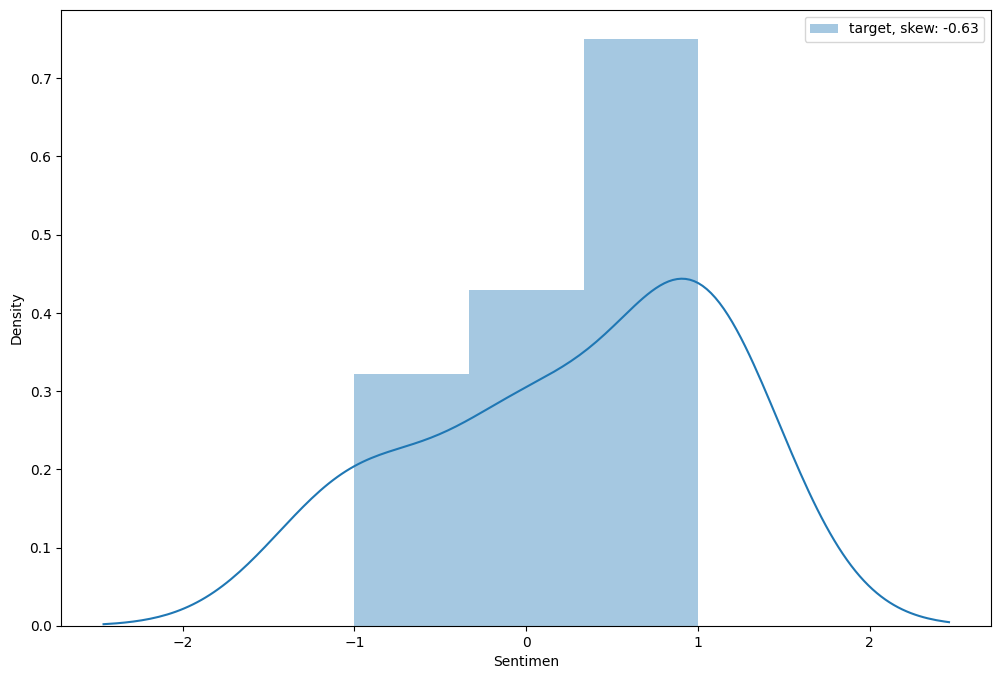

In [35]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [36]:
dataset_label.value_counts()

Sentimen
 1.0    7
 0.0    4
-1.0    3
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.metrics import recall_score

In [40]:
from sklearn.metrics import f1_score

In [41]:
from sklearn.metrics import precision_score

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
Tfidf_Vectorizer = TfidfVectorizer()

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [48]:
parameters_nb = {
                'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
                #'tfidf__use_idf': (True, False),
                'model__alpha': (0, 1, 1e-2, 1e-3)
}

In [49]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [50]:
classifier_nb.fit(train_x, train_label.ravel())

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [51]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.4


In [52]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.4


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.5


In [54]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  1.0
F1 Test set:  0.44000000000000006


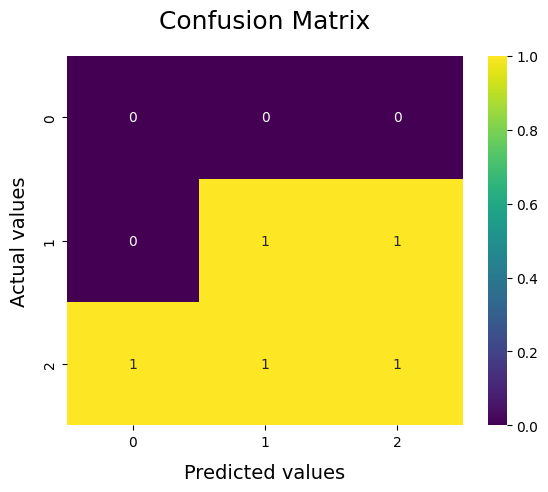

In [55]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [56]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0))])

In [57]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0
tfidf__ngram_range: (1, 1)


In [58]:
from sklearn.svm import SVC

In [59]:
from sklearn.pipeline import Pipeline
classifier_svc = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', SVC()),
])

In [60]:
parameters_svc = {
                'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
                #'tfidf__use_idf': (True, False),
                'model__kernel' : ['linear'],
                'model__C' : [0.00001,0.0001,0.001,0.01,0.1,1,10,100],
                'model__random_state' : [42]
}

In [61]:
classifier_svm_linear = GridSearchCV(classifier_svc, parameters_svc, cv = 3, n_jobs=-1)

In [62]:
classifier_svm_linear.fit(train_x, train_label.ravel())

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                      100],
                         'model__kernel': ['linear'],
                         'model__random_state': [42],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [63]:
y_pred_svm_linear_train = classifier_svm_linear.predict(train_x)
accuracy_svm_linear_train = accuracy_score(train_label, y_pred_svm_linear_train)
print("Accuracy Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(test_x)
accuracy_svm_linear_test = accuracy_score(test_label, y_pred_svm_linear_test)
print("Accuracy Test set: ", accuracy_svm_linear_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.4


In [64]:
recall_svm_linear_train = recall_score(train_label, y_pred_svm_linear_train, average='weighted')
print("Recall Training set: ", recall_svm_linear_train)

recall_svm_linear_test = recall_score(test_label, y_pred_svm_linear_test, average='weighted')
print("Recall Test set: ", recall_svm_linear_test)

Recall Training set:  1.0
Recall Test set:  0.4


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
precision_svm_linear_train = precision_score(train_label, y_pred_svm_linear_train, average='weighted')
print("Precision Training set: ", precision_svm_linear_train)

precision_svm_linear_test = precision_score(test_label, y_pred_svm_linear_test, average='weighted')
print("Precision Test set: ", precision_svm_linear_test)

Precision Training set:  1.0
Precision Test set:  0.7


In [66]:
f1_svm_linear_train = f1_score(train_label, y_pred_svm_linear_train, average='weighted')
print("F1 Training set: ", f1_svm_linear_train)

f1_svm_linear_test = f1_score(test_label, y_pred_svm_linear_test, average='weighted')
print("F1 Test set: ", f1_svm_linear_test)

F1 Training set:  1.0
F1 Test set:  0.5066666666666666


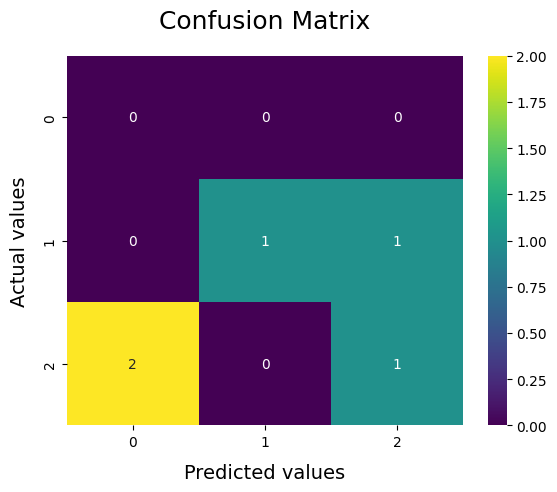

In [67]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [68]:
classifier_svm_linear.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', SVC(C=10, kernel='linear', random_state=42))])

In [69]:
for param_name in sorted(parameters_svc.keys()):
    print("%s: %r" % (param_name, classifier_svm_linear.best_params_[param_name]))

model__C: 10
model__kernel: 'linear'
model__random_state: 42
tfidf__ngram_range: (1, 1)


In [70]:
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

classifier_dt = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', DecisionTreeClassifier()),
])

In [71]:
parameters_dt = {
                "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3), (1, 4)],
                #"tfidf__use_idf": (True, False),
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                "model__min_samples_split": np.arange(2, 11),
                "model__criterion": ['gini','entropy'],
                "model__random_state" : [42]
}

In [72]:
classifier_dt = GridSearchCV(classifier_dt, parameters_dt, cv = 3, n_jobs=-1)

In [73]:
classifier_dt = classifier_dt.fit(train_x, train_label.ravel())

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [74]:
y_pred_dt_train = classifier_dt.predict(train_x)
accuracy_dt_train = accuracy_score(train_label, y_pred_dt_train)
print("Accuracy Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(test_x)
accuracy_dt_test = accuracy_score(test_label, y_pred_dt_test)
print("Accuracy Test set: ", accuracy_dt_test)

Accuracy Training set:  0.6666666666666666
Accuracy Test set:  0.6


In [75]:
recall_dt_train = recall_score(train_label, y_pred_dt_train, average='weighted')
print("Recall Training set: ", recall_dt_train)

recall_dt_test = recall_score(test_label, y_pred_dt_test, average='weighted')
print("Recall Test set: ", recall_dt_test)

Recall Training set:  0.6666666666666666
Recall Test set:  0.6


In [76]:
precision_dt_train = precision_score(train_label, y_pred_dt_train, average='weighted')
print("Precision Training set: ", precision_dt_train)

precision_dt_test = precision_score(test_label, y_pred_dt_test, average='weighted')
print("Precision Test set: ", precision_dt_test)

Precision Training set:  0.5873015873015873
Precision Test set:  0.36


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
f1_dt_train = f1_score(train_label, y_pred_dt_train, average='weighted')
print("F1 Training set: ", f1_dt_train)

f1_dt_test = f1_score(test_label, y_pred_dt_test, average='weighted')
print("F1 Test set: ", f1_dt_test)

F1 Training set:  0.5898989898989899
F1 Test set:  0.4499999999999999


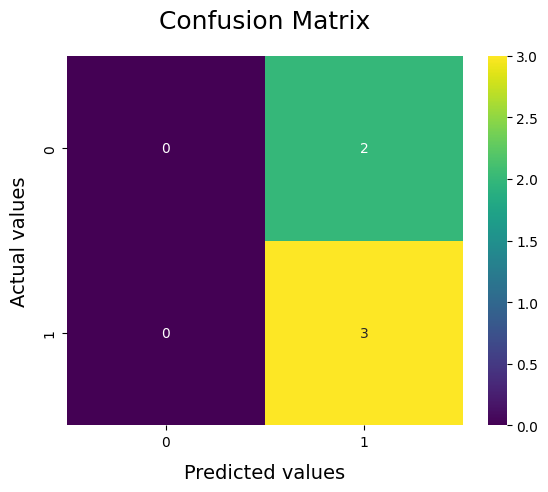

In [78]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [79]:
classifier_dt.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('model',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [80]:
for param_name in sorted(parameters_dt.keys()):
    print("%s: %r" % (param_name, classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42
tfidf__ngram_range: (1, 2)


In [81]:
models = [
        ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
        ('SVM Linear', accuracy_svm_linear_train, accuracy_svm_linear_test),
        ('Decision Tree', accuracy_dt_train, accuracy_dt_test),
        ]

In [82]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.000000,0.4
1,SVM Linear,1.000000,0.4
2,Decision Tree,0.666667,0.6


In [83]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test),
                        ('SVM Linear', accuracy_svm_linear_test, recall_svm_linear_test, precision_svm_linear_test, f1_svm_linear_test),
                        ('Decision Tree', accuracy_dt_test, recall_dt_test, precision_dt_test,f1_dt_test),
                    ]

In [84]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.4,0.4,0.50,0.440000
1,SVM Linear,0.4,0.4,0.70,0.506667
2,Decision Tree,0.6,0.6,0.36,0.450000


C:\Users\USER\AppData\Local\Temp\ipykernel_4820\2750282873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_4820\2750282873.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])


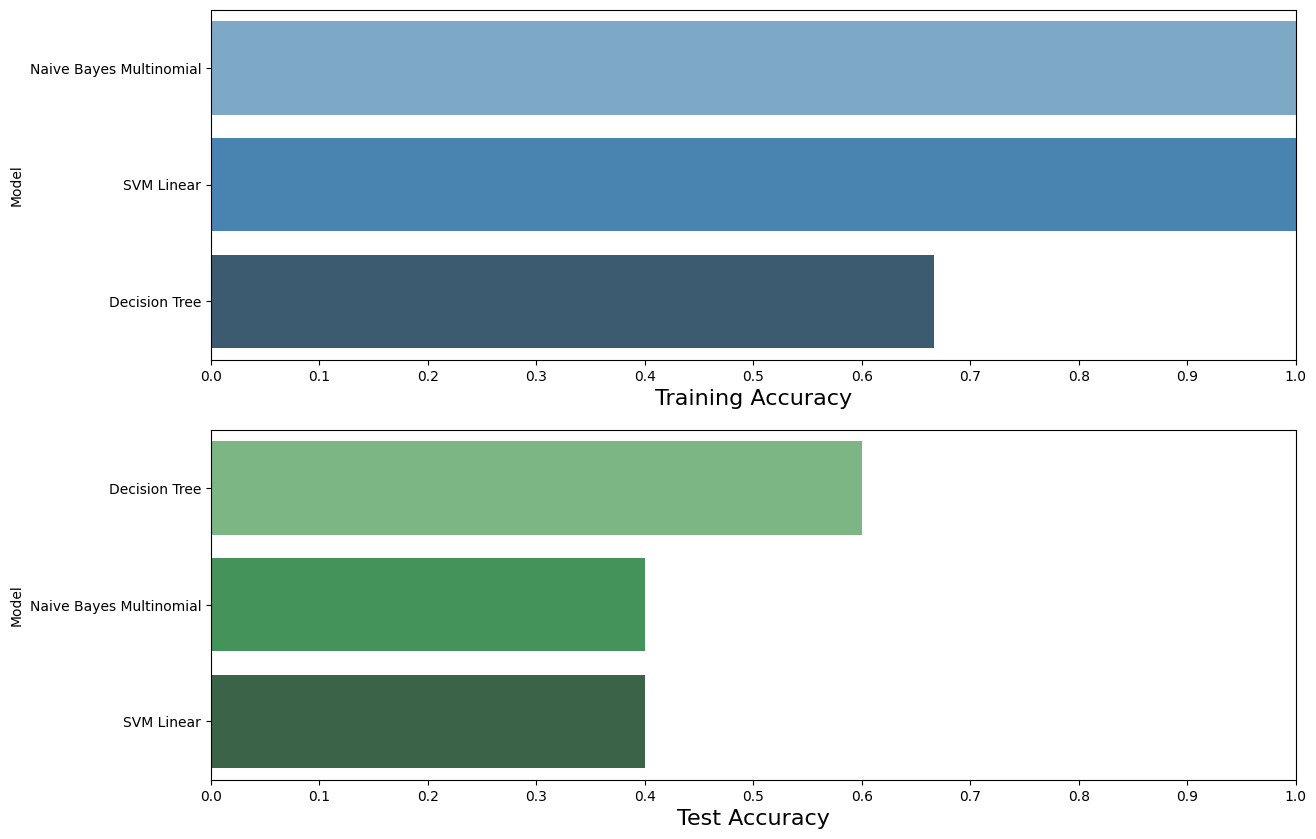

In [85]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [86]:
dataset.loc[9].ProcessedText

'iamalanwalker in new photos'